In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./ANSUR_II_MALE_Public.csv', encoding='latin-1')
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [3]:
#find the missing values in the dataset
df.isnull().sum().sort_values(ascending = False).head()

Ethnicity                         3180
WritingPreference                    0
forearmforearmbreadth                0
crotchlengthomphalion                0
crotchlengthposterioromphalion       0
dtype: int64

In [4]:
#find the missing values in the dataset
# missing percentage
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head()

Ethnicity                         77.902989
WritingPreference                  0.000000
forearmforearmbreadth              0.000000
crotchlengthomphalion              0.000000
crotchlengthposterioromphalion     0.000000
dtype: float64

In [5]:
df = df.drop(['Ethnicity'],axis = 1)

In [6]:
#select 10 length data (randomly)
len_data = df[['handlength','acromionradialelength',
               'balloffootlength','earlength',
               'footlength','forearmhandlength',
               'functionalleglength','headlength',
               'palmlength','shoulderlength']] 

In [7]:
len_data.head()

,handlength,acromionradialelength,balloffootlength,earlength,footlength,forearmhandlength,functionalleglength,headlength,palmlength,shoulderlength
0,193,337,202,71,273,477,1136,206,113,145
1,195,326,193,62,263,476,1096,201,118,141
2,203,341,196,61,270,491,1115,202,121,167
3,194,310,199,66,267,467,1034,199,118,148
4,218,372,224,56,305,550,1279,197,132,180


In [8]:
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(len_data.values)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = ['handlength','acromionradialelength',
                       'balloffootlength','earlength',
                       'footlength','forearmhandlength',
                       'functionalleglength','headlength',
                       'palmlength','shoulderlength']
scaled_data.head(10)

C:\Users\35835\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\35835\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,handlength,acromionradialelength,balloffootlength,earlength,footlength,forearmhandlength,functionalleglength,headlength,palmlength,shoulderlength
0,-0.027933,0.100426,0.101715,1.505759,0.139047,-0.138031,0.104153,0.924781,-0.554558,-0.454346
1,0.173167,-0.528841,-0.757912,-0.491446,-0.624254,-0.180980,-0.608384,0.212901,0.247776,-0.834863
2,0.977571,0.329250,-0.471370,-0.713357,-0.089943,0.463251,-0.269929,0.355277,0.729177,1.638497
3,0.072617,-1.444139,-0.184827,0.396201,-0.318933,-0.567518,-1.712816,-0.071851,0.247776,-0.168958
4,2.485828,2.102639,2.203024,-1.822916,2.581610,2.997224,2.651473,-0.356602,2.494313,2.875177
5,-0.329585,0.500869,-1.617538,0.840024,-1.311225,-0.438672,-0.073981,-0.214227,-0.233624,-0.454346
6,2.686929,0.443663,0.579285,1.061936,1.055008,2.395942,1.279839,1.636660,2.815247,1.353109
7,0.474819,1.416166,0.483771,-0.047622,0.749688,0.806840,0.691996,-2.065113,1.210578,-0.549475
8,0.374268,0.214838,-0.280341,2.171494,-0.395263,-0.223929,0.424795,-0.214227,0.889644,-0.644604
9,0.675920,0.558075,0.292743,1.727671,0.520698,1.193379,0.228847,-1.353234,0.408243,-0.264087


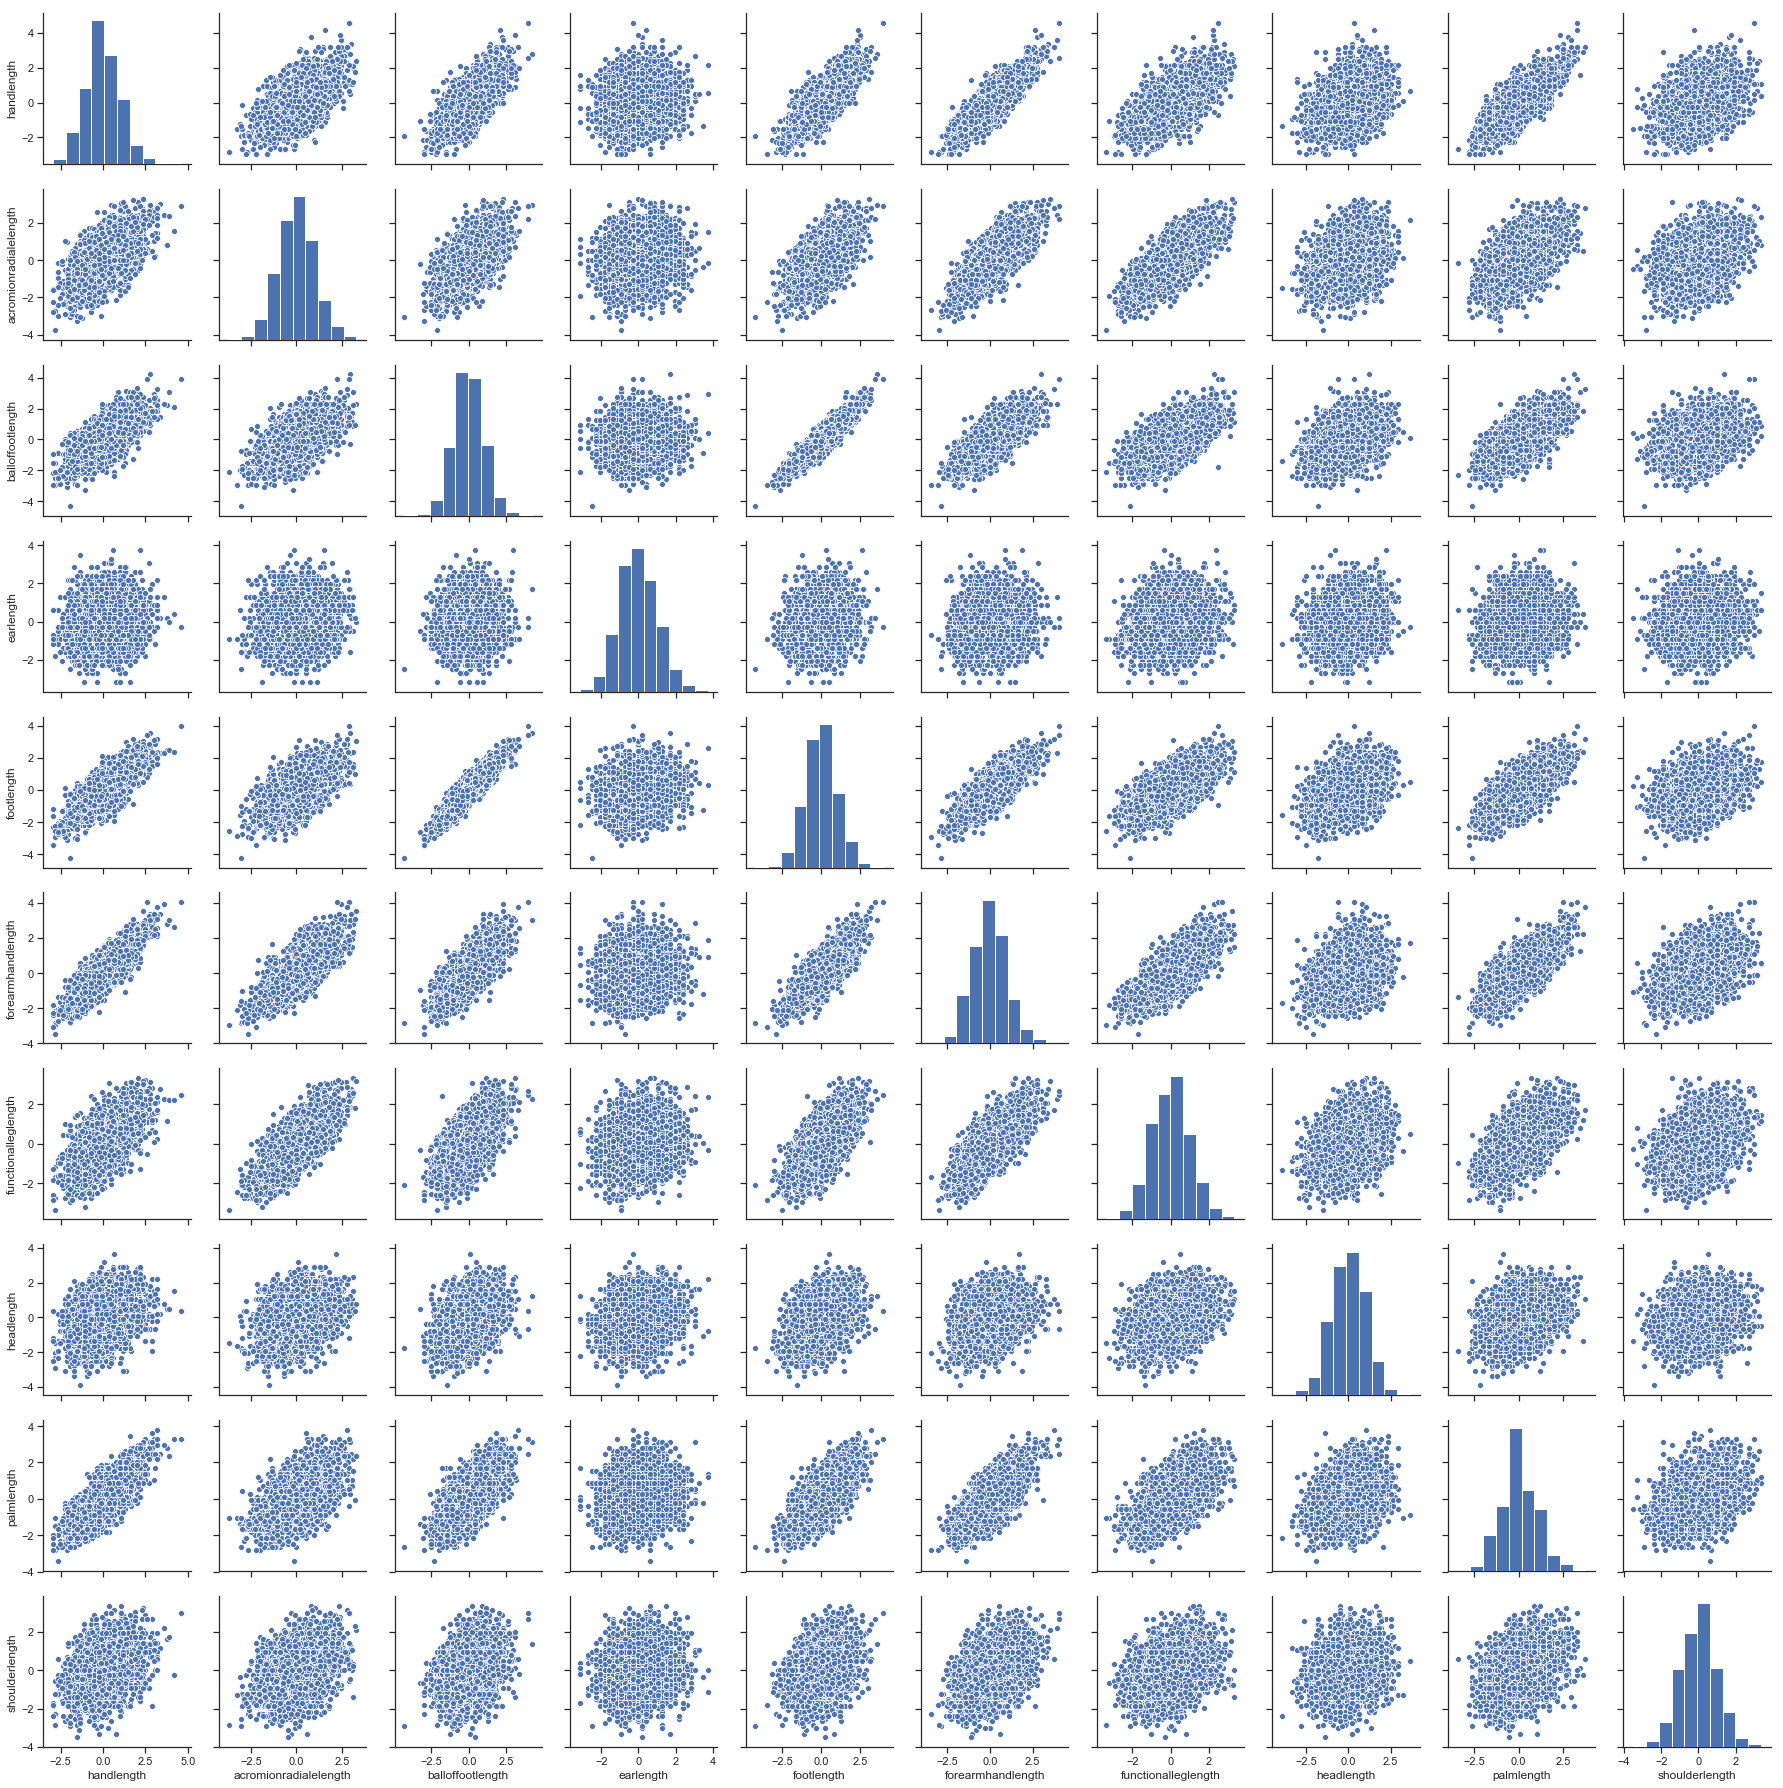

In [9]:
#Variable correlation scatter plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(scaled_data)
plt.show()

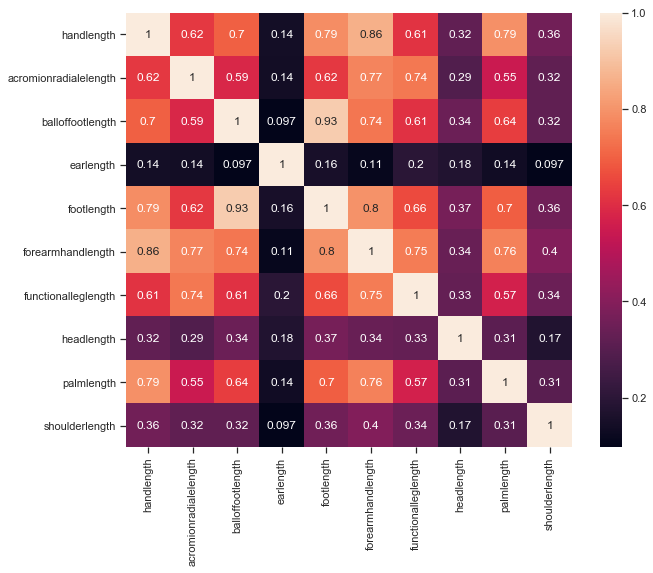

In [10]:
#Variable correlation heatmap
plt.figure(figsize = (10,8))
corrmat = scaled_data.corr()
sns.heatmap(corrmat,annot = True)
plt.show()

In [11]:
pca=PCA(n_components=0.95)
#return the dimensionality data
pcaMat = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.56388316 0.10304522 0.08244119 0.07749498 0.06270079 0.04774554
 0.02610975]
[5.64021335 1.03070471 0.8246139  0.77513973 0.6271615  0.47757242
 0.26116148]
7


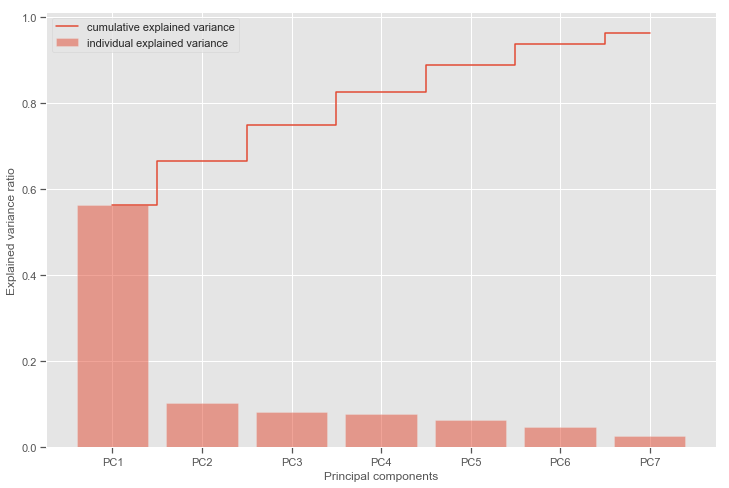

In [12]:
#Visualize PCA variance contribution rate
plt.style.use('ggplot')
plt.figure(figsize = (12,8))
plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], pca.explained_variance_ratio_, alpha=0.5, align='center',
       label = "individual explained variance")
plt.step(range(0, 7), np.cumsum(pca.explained_variance_ratio_), where='mid',label = "cumulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [13]:
len_data.head()

,handlength,acromionradialelength,balloffootlength,earlength,footlength,forearmhandlength,functionalleglength,headlength,palmlength,shoulderlength
0,193,337,202,71,273,477,1136,206,113,145
1,195,326,193,62,263,476,1096,201,118,141
2,203,341,196,61,270,491,1115,202,121,167
3,194,310,199,66,267,467,1034,199,118,148
4,218,372,224,56,305,550,1279,197,132,180


In [14]:
new_df = len_data.drop('handlength',1)

In [15]:
new_df.head()

,acromionradialelength,balloffootlength,earlength,footlength,forearmhandlength,functionalleglength,headlength,palmlength,shoulderlength
0,337,202,71,273,477,1136,206,113,145
1,326,193,62,263,476,1096,201,118,141
2,341,196,61,270,491,1115,202,121,167
3,310,199,66,267,467,1034,199,118,148
4,372,224,56,305,550,1279,197,132,180


In [16]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\35835\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
feat_labels = len_data.columns[1:]
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(new_df,len_data.handlength)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [18]:
features = new_df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:9])[::-1]  # top 10 features
print(" Feature Importance")
for f in range(new_df.shape[1]):
    print("%2d. %-*s %f" % (f+1, 30 ,features[indices[f]], importances[indices[f]]))

 Feature Importance
 1. forearmhandlength              0.794502
 2. palmlength                     0.070822
 3. footlength                     0.045968
 4. functionalleglength            0.021386
 5. acromionradialelength          0.015593
 6. shoulderlength                 0.014628
 7. headlength                     0.013501
 8. earlength                      0.011976
 9. balloffootlength               0.011624


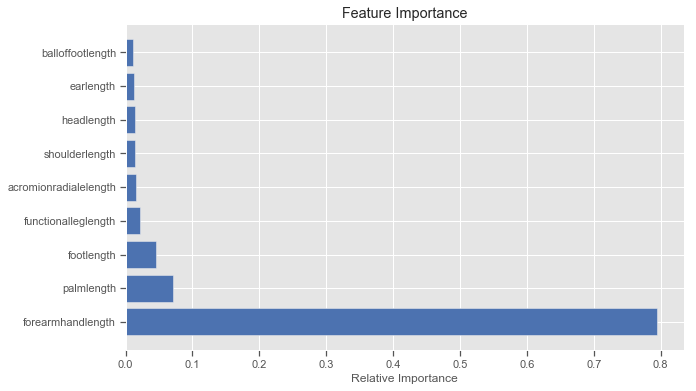

In [19]:
plt.figure(figsize = (10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
from sklearn.feature_selection import SelectFromModel
# Set a minimum threshold of 0.02
sfm = SelectFromModel(model, threshold=0.02)
sfm.fit(new_df,len_data.handlength)
n_features = sfm.transform(new_df).shape[1]
print("Number of features:",n_features)

Number of features: 4
